Following the **Mean global DNA methylation serves as independent prognostic marker in IDH-wildtype glioblastoma** paper 

In [1]:
import pandas as pd
import numpy as np

wd = "C:/Users/mmarc/Documents/code/P-Net-Reproducibility-Paper-Fork/Radiosensitivity Prediction/data"

In [2]:
genes_used_in_mean_meth_paper = pd.read_csv('all_genes_from_beta_data.txt')
gene_list = genes_used_in_mean_meth_paper.iloc[:, 0].astype(str).tolist()

1. Import the methylaiton and response data

2. Preprocess the data dn match methylation with response

fill the NaN values with np.nan (instead of zeros like it was done in preprocess.py)


In [3]:
df = pd.read_csv(f"{wd}/Cleveland/CCLE_RRBS_TSS1kb_20181022.txt", sep="\t").dropna()
df["locus_id"] = df["locus_id"].apply(lambda x : x.split("_")[0])
df = df.drop(df.columns[1:3], axis=1)
df.iloc[:, 1:] = df.iloc[:, 1:].apply(lambda x : pd.to_numeric(x, errors="coerce")).fillna(np.nan)
df = df.groupby("locus_id").mean().T
df.index = [x.split("_")[0] for x in df.index]
df = df.loc[~df.index.duplicated(keep="first")]
df.head()

C:\Users\mmarc\AppData\Local\Temp\ipykernel_25732\390859071.py:1: DtypeWarning: Columns (2,618) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(f"{wd}/Cleveland/CCLE_RRBS_TSS1kb_20181022.txt", sep="\t").dropna()


locus_id,A1BG,A1BG-AS1,A2M-AS1,A3GALT2,A4GALT,AAAS,AACS,AADACL3,AADAT,AAGAB,...,ZSWIM9,ZUP1,ZWILCH,ZWINT,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
DMS53,0.51504,0.59476,0.00442,NaN,0.0,0.0921,0.0,0.129,0.004027,0.0,...,0.0,0.16253,0.0,0.0,0.0,0.0,0.0229,0.00203,0.0101,0.0
SW1116,0.5,0.4444,0.00645,0.16665,0.01401,0.0,0.0,1.0,0.009673,0.0,...,0.0,0.26139,0.0,0.0,0.0,0.5294,0.0,0.0,0.0,0.0
P3HR1,0.98288,0.96342,0.95503,NaN,0.00806,0.005,0.02762,0.36497,0.949727,0.02055,...,0.05401,0.22041,0.0225,0.0,0.09392,0.83335,0.01404,0.07789,0.03783,0.01905
HUT78,1.0,1.0,0.92654,NaN,0.22223,0.0,0.03727,0.0,0.45588,0.025805,...,0.0,0.30263,0.0,0.0,0.07543,0.0,0.00548,0.00331,0.10369,0.0
UMUC3,0.55295,0.77274,0.53876,NaN,0.00504,0.0,0.01565,0.0741,0.104427,0.000605,...,0.00055,0.12587,0.0,0.0082,0.02688,0.01725,0.0,0.00101,0.04651,0.00379


In [3]:
# use the combined methylation file
df = pd.read_csv('aggreagated_ccle_meth.csv')
df.iloc[:, 1:] = df.iloc[:, 1:].apply(lambda x : pd.to_numeric(x, errors="coerce")).fillna(np.nan)
df = df.groupby("Gene").mean().T
df.index = [x.split("_")[0] for x in df.index]
df = df.loc[~df.index.duplicated(keep="first")]
df.head()

Gene,A1BG,A1BG-AS1,A2M-AS1,A2ML1,A3GALT2,A4GALT,AAAS,AACS,AADACL2-AS1,AADACL3,...,ZWILCH,ZWINT,ZXDA,ZXDB,ZXDC,ZYG11A,ZYG11B,ZYX,ZZEF1,ZZZ3
22RV1,0.700977,0.864430,0.487984,0.811535,0.945782,0.265204,0.502530,0.522998,0.475000,0.040000,...,0.0,0.0000,0.333333,0.17926,0.452311,0.308764,0.03355,0.547548,0.234885,0.065198
2313287,0.292737,0.325102,0.225840,0.214016,0.547574,0.227683,0.169703,0.341364,0.482133,0.087732,...,0.0,0.0145,0.066667,0.00000,0.144820,0.447938,0.00000,0.343440,0.140206,0.005582
253J,0.948531,1.000000,0.864180,0.749033,0.919390,0.321631,0.000000,0.493750,0.642900,0.597163,...,0.0,0.0000,0.000000,0.00000,0.008228,0.019467,0.00000,0.313680,0.335415,0.257567
42MGBA,0.729255,0.964366,0.650941,0.362362,0.895300,0.573191,0.475253,0.577684,0.857150,0.893600,...,0.0,0.0000,0.350745,0.43750,0.189344,0.866186,0.00624,0.180675,0.475263,0.323356
5637,0.563342,0.661393,0.363861,0.728373,0.744416,0.423847,0.339317,0.570812,1.000000,0.000000,...,0.0,0.0000,0.004173,0.00000,0.286446,0.537378,0.00000,0.281527,0.432040,0.129579


In [ ]:
# OPTIONAL - use only the genes that were used in the original 'mean methylation' paper
genes_used_in_mean_meth_paper = pd.read_csv('C:/Users/mmarc/Documents/code/P-Net-Reproducibility-Paper-Fork/all_genes_from_beta_data.txt')
gene_list = genes_used_in_mean_meth_paper.iloc[:, 0].astype(str).tolist()

df['locus_id'] = df['locus_id'].str.upper()
gene_list_upper = [gene.upper() for gene in gene_list]

print(f"before: {len(df)}")
df = df[df['locus_id'].isin(gene_list_upper)].reset_index(drop=True)
print(f"after: {len(df)}")

print(f"list length {len(gene_list)}")

In [4]:
# OPTIONAL
## Second version: fill the 0.0 with NaN
df = df.replace(0, np.nan)

In [5]:
info = pd.read_csv(f'{wd}/Cleveland/cleveland_sampleInfo.csv')
info.head()

,CellLine,Primarysite,Histology,Subhistology
0,SKNFI,autonomic_ganglia,neuroblastoma,NS
1,IMR32,autonomic_ganglia,neuroblastoma,NS
2,SKNAS,autonomic_ganglia,neuroblastoma,NS
3,CHP212,autonomic_ganglia,neuroblastoma,NS
4,KPNSI9S,autonomic_ganglia,neuroblastoma,NS


In [6]:
n_nan_rows = df.isna().any(axis=1).sum()
n_nan_cols = df.isna().any(axis=0).sum()
print(f"Rows with NaNs: {n_nan_rows}")
print(f"Columns with NaNs: {n_nan_cols}")

non_numeric_cols = df.columns[~df.apply(pd.api.types.is_numeric_dtype)]
print("Non-numeric columns:", list(non_numeric_cols))

# Show columns with more than 30% missing values
threshold = 0.3
many_nan_cols = df.columns[df.isna().mean() > threshold]
print("Columns with >30% NaNs:", list(many_nan_cols))

many_nan_rows = df.index[df.isna().mean(axis=1) > threshold]
print(f"Rows with >{int(threshold * 100)}% NaNs:", list(many_nan_rows))

Rows with NaNs: 842
Columns with NaNs: 20014
Non-numeric columns: []
Columns with >30% NaNs: ['AASDH', 'AASDHPPT', 'ABCA5', 'ABCB7', 'ABCC11', 'ABCC5-AS1', 'ABCD1', 'ABCE1', 'ABCF1', 'ABHD10', 'ABHD16A', 'ABI1', 'ABITRAM', 'ABRAXAS1', 'ACAA2', 'ACAD8', 'ACCS', 'ACO2', 'ACOT1', 'ACOT13', 'ACP2', 'ACPP', 'ACSL3', 'ACSM6', 'ACTC1', 'ACTG1P20', 'ACTR10', 'ACTR1A', 'ACTR3', 'ACTR3-AS1', 'ACTR8', 'ACVR2A', 'ADAM17', 'ADAMTS7P1', 'ADAT2', 'ADGRA3', 'ADGRG3', 'ADPGK', 'AFP', 'AGAP6', 'AGAP7P', 'AGGF1', 'AGPAT5', 'AHI1', 'AHSA1', 'AIG1', 'AIM2', 'AIMP1', 'AKAP3', 'ALAD', 'ALDH6A1', 'ALDH9A1', 'ALG1', 'ALG10B', 'ALG1L9P', 'ALG5', 'ALG8', 'ALKBH1', 'ALKBH2', 'ALKBH8', 'ALMS1', 'AMBP', 'AMN1', 'AMOT', 'ANAPC10', 'ANAPC15', 'ANAPC16', 'ANAPC1P2', 'ANKRD20A1', 'ANKRD20A11P', 'ANKRD20A19P', 'ANKRD20A2', 'ANKRD20A3', 'ANKRD20A4', 'ANKRD20A4-ANKRD20A20P', 'ANKRD26', 'ANKRD30BP2', 'ANKRD31', 'ANKRD36', 'ANKRD36C', 'ANKRD40CL', 'ANKRD49', 'ANO6', 'ANTXRL', 'AP1S2', 'AP3M1', 'API5', 'APOBEC3B', 'APOC1P1',

In [7]:
labels = pd.read_csv('C:/Users/mmarc/Documents/code/P-Net-Reproducibility-Paper-Fork/Radiosensitivity Prediction/data/Cleveland/cleveland_auc_only.csv')

In [8]:
# match by common cell line name
meth_cell_lines = df.index
labels_cell_lines = labels['id'].values
common_cell_lines = [m for m in meth_cell_lines if m in labels_cell_lines]

y = labels.set_index('id').loc[common_cell_lines].reset_index()
df = df.loc[common_cell_lines]

print(y)
print(df)

         id       auc
0     22RV1  2.464957
1    42MGBA  2.636072
2      5637  1.778956
3      647V  1.949934
4      769P  2.647596
..      ...       ...
446     YD8  4.751475
447    YH13  2.921189
448    YKG1  1.127372
449   ZR751  5.124183
450  ZR7530  6.577554

[451 rows x 2 columns]
Gene        A1BG  A1BG-AS1   A2M-AS1     A2ML1   A3GALT2    A4GALT      AAAS  \
22RV1   0.700977  0.864430  0.487984  0.811535  0.945782  0.265204  0.502530   
42MGBA  0.729255  0.964366  0.650941  0.362362  0.895300  0.573191  0.475253   
5637    0.563342  0.661393  0.363861  0.728373  0.744416  0.423847  0.339317   
647V    0.555697  0.694338  0.297620  0.624993  0.811513  0.390633  0.333333   
769P    0.647612  0.728296  0.501806  0.565398  0.770234  0.501901  0.492407   
...          ...       ...       ...       ...       ...       ...       ...   
YD8     0.794775  0.947149  0.401069  0.862180  0.883137  0.481906  0.495698   
YH13    0.655867  0.814730  0.447277  0.595340  0.808708  0.282924  0.43

3. Calculate the mean methyaltion per sample

In [9]:
mean_methylation = df.mean(axis=1, skipna=True)
df['mean_methylation'] = mean_methylation

median_methylation = df.median(axis=1, skipna=True)
df['median_methylation'] = median_methylation

4. Statistical Analysis

5. Divide the samples into resistant and not resistand based on median cutoff value
*"Next, we stratified the cohort into long and short surviving
patients based on the median OS of 15.8 months"*

In [10]:
median = y['auc'].median(axis=0)
print(f"Median cutoff vlaue {median}")

y['class'] = (y['auc'] >= median).astype(int)
y.head()
print(f"We have {y['class'].sum()} class '1: resistant' out of {len(y)} all")

Median cutoff vlaue 2.68097035069631
We have 226 class '1: resistant' out of 451 all


In [11]:
print(f"Median methylation value is: {df['mean_methylation'].median()}")

Median methylation value is: 0.388122943704566


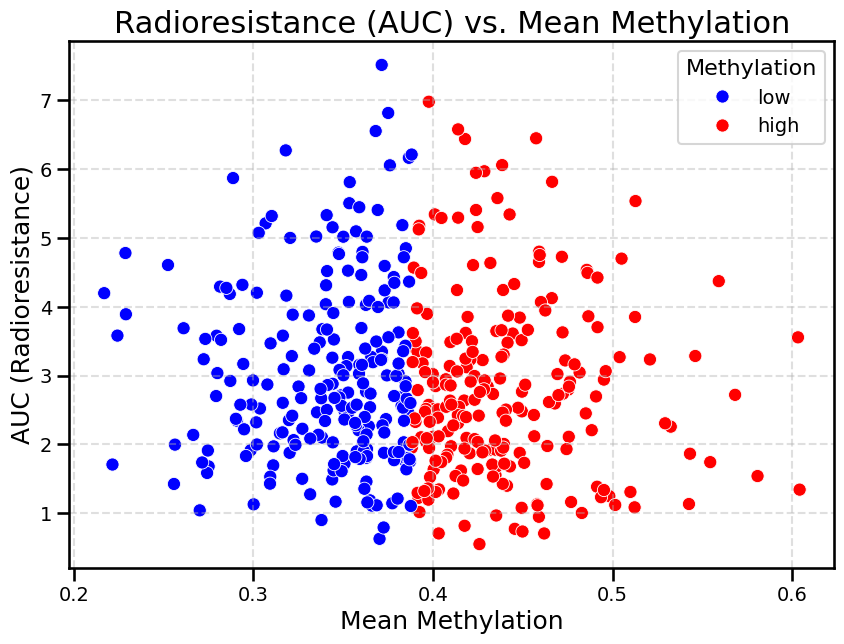

In [15]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Ensure 'id' is index in y
y_indexed = y.set_index('id')

# Join on index (only what's needed)
plot_df = df[['mean_methylation']].join(y_indexed[['auc']]).copy()

# Drop rows with missing values
plot_df = plot_df.dropna(subset=['mean_methylation', 'auc'])

# Define methylation groups by median threshold
methyl_thresh = np.nanmedian(plot_df['mean_methylation'])
plot_df['methylation_group'] = np.where(
    plot_df['mean_methylation'] <= methyl_thresh, 'low', 'high'
)

# Bigger, publication-friendly styling
sns.set_context("talk", font_scale=1.4)
plt.figure(figsize=(9, 7))

ax = sns.scatterplot(
    data=plot_df,
    x='mean_methylation', y='auc',
    hue='methylation_group',
    hue_order=['low', 'high'],
    palette={'low': 'blue', 'high': 'red'},
    s=90, edgecolor='white', linewidth=0.6
)

plt.title("Radioresistance (AUC) vs. Mean Methylation", fontsize=22)
plt.xlabel("Mean Methylation", fontsize=18)
plt.ylabel("AUC (Radioresistance)", fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(title="Methylation", fontsize=14, title_fontsize=16)
plt.grid(True, linestyle="--", alpha=0.4)
plt.tight_layout()
plt.show()


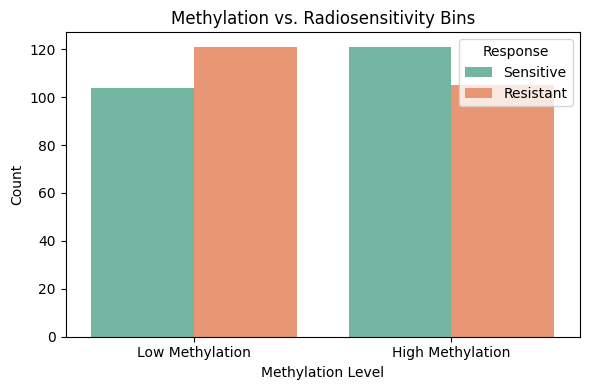

In [19]:
# Create categorical bins
meth_median = plot_df['mean_methylation'].median()
auc_median = plot_df['auc'].median()

plot_df['methylation_bin'] = (plot_df['mean_methylation'] >= meth_median).map({True: 'High Methylation', False: 'Low Methylation'})
plot_df['auc_bin'] = (plot_df['auc'] >= auc_median).map({True: 'Resistant', False: 'Sensitive'})

plt.figure(figsize=(6, 4))
sns.countplot(data=plot_df, x='methylation_bin', hue='auc_bin', palette='Set2')
plt.title("Methylation vs. Radiosensitivity Bins")
plt.xlabel("Methylation Level")
plt.ylabel("Count")
plt.legend(title="Response")
plt.tight_layout()
plt.show()


## Figure 1:

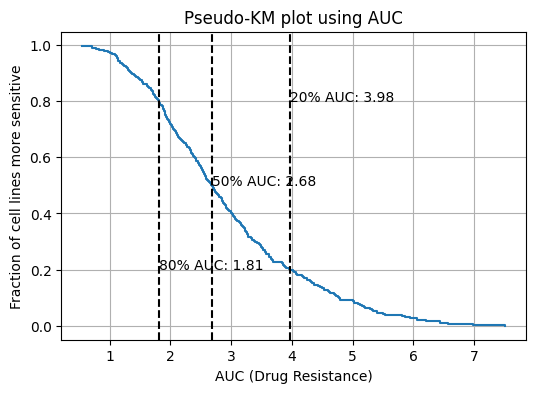

In [20]:
import numpy as np
import matplotlib.pyplot as plt

auc = np.array(y['auc'].values.ravel())  # replace with your actual AUC array
auc_sorted = np.sort(auc)
n = len(auc_sorted)

surv_prob = 1 - np.arange(1, n + 1) / n


plt.figure(figsize=(6, 4))
plt.step(auc_sorted, surv_prob, where="post", label="AUC survival-like curve")
plt.xlabel("AUC (Drug Resistance)")
plt.ylabel("Fraction of cell lines more sensitive")
plt.title("Pseudo-KM plot using AUC")
plt.grid(True)


def label_auc_threshold(threshold, label):
    idx = int((1 - threshold) * n)
    auc_val = auc_sorted[idx]
    plt.axvline(auc_val, color='k', linestyle='--')
    plt.text(auc_val, 1 - threshold, f"{int(threshold*100)}% AUC: {auc_val:.2f}", ha="left")

label_auc_threshold(0.8, "80%")
label_auc_threshold(0.5, "median")
label_auc_threshold(0.2, "20%")

plt.show()

## Plot 2. B.

In [21]:
mean_methylation = df['mean_methylation']

merged = (
    info.set_index("CellLine")
    .join(mean_methylation.rename("mean_methylation"))
    .join(y.set_index("id")["auc"]) 
    .dropna()
)
merged

,Primarysite,Histology,Subhistology,mean_methylation,auc
CellLine,,,,,
SKNFI,autonomic_ganglia,neuroblastoma,NS,0.331533,2.861642
IMR32,autonomic_ganglia,neuroblastoma,NS,0.352339,0.549051
SKNAS,autonomic_ganglia,neuroblastoma,NS,0.306782,3.258931
CHP212,autonomic_ganglia,neuroblastoma,NS,0.360219,1.344093
KPNSI9S,autonomic_ganglia,neuroblastoma,NS,0.343488,2.325173
...,...,...,...,...,...
RT112,urinary_tract,carcinoma,transitional_cell_carcinoma,0.339002,2.376197
SW1710,urinary_tract,carcinoma,transitional_cell_carcinoma,0.357235,2.545441
TCCSUP,urinary_tract,carcinoma,transitional_cell_carcinoma,0.252695,3.236194


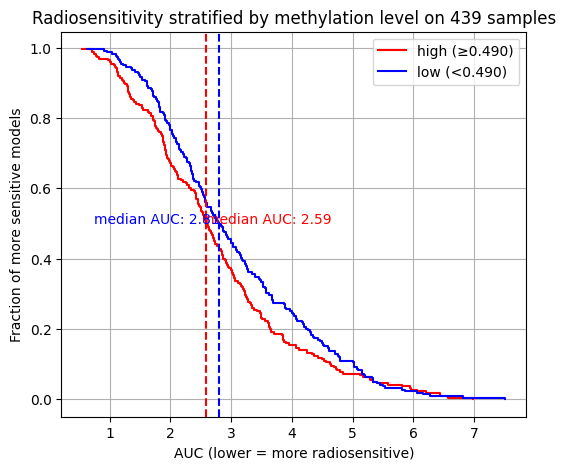

In [22]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

column_name = 'Primarysite'
column_val = 'central_nervous_system'

specific = merged[merged[column_name] == column_val]

# specific = specific[specific["Histology"] == "glioma"]

specific = merged

# Example arrays
auc = np.array(specific['auc'].values.ravel())

methylation = np.array(specific['mean_methylation'].values.ravel())

threshold = np.median(methylation)
group_high = methylation >= threshold
group_low = methylation < threshold

auc_high = auc[group_high]
auc_low = auc[group_low]

def pseudo_km_curve(auc_values):
    auc_sorted = np.sort(auc_values)
    surv_prob = 1 - np.arange(1, len(auc_sorted)+1) / len(auc_sorted)
    return auc_sorted, surv_prob

auc_h, surv_h = pseudo_km_curve(auc_high)
auc_l, surv_l = pseudo_km_curve(auc_low)

plt.figure(figsize=(6, 5))

plt.step(auc_h, surv_h, where="post", color="red", label="high (≥0.490)")
plt.step(auc_l, surv_l, where="post", color="blue", label="low (<0.490)")

# Annotate medians
median_h = np.median(auc_high)
median_l = np.median(auc_low)
plt.axvline(median_h, color="red", linestyle="--")
plt.axvline(median_l, color="blue", linestyle="--")
plt.text(median_h, 0.5, f"median AUC: {median_h:.2f}", color="red", ha="left")
plt.text(median_l, 0.5, f"median AUC: {median_l:.2f}", color="blue", ha="right")

plt.xlabel("AUC (lower = more radiosensitive)")
plt.ylabel("Fraction of more sensitive models")
plt.title(f"Radiosensitivity stratified by methylation level on {len(specific)} samples")
plt.legend()
plt.grid(True)
plt.show()


### Version with best threshold

In [23]:

column_name = 'Histology'
column_val = 'malignant_melanoma'

specific = merged[merged[column_name] == column_val]

# specific = merged

# specific = specific[specific["Histology"] == "glioma"]

# Example arrays
auc = np.array(specific['auc'].values.ravel())

methylation = np.array(specific['mean_methylation'].values.ravel())

thresholds = np.linspace(methylation.min() + 1e-4, methylation.max() - 1e-4, 1000)
best_score = -np.inf
best_threshold = None
min_group_size = 0.2*len(auc)

for t in thresholds:
    group_high = methylation >= t
    group_low = methylation < t

    if group_high.sum() < min_group_size or group_low.sum() < min_group_size:
        continue

    auc_high = auc[group_high]
    auc_low = auc[group_low]

    score = np.abs(np.median(auc_low) - np.median(auc_high))  # Higher score = better separation

    if score > best_score:
        best_score = score
        best_threshold = t

print(f"Best threshold: {best_threshold:.3f}, Score: {best_score:.3f}")

group_high = methylation >= best_threshold
group_low = methylation < best_threshold

auc_high = auc[group_high]
auc_low = auc[group_low]

print( np.median(auc_low) - np.median(auc_high))

def pseudo_km_curve(auc_values):
    auc_sorted = np.sort(auc_values)
    surv_prob = 1 - np.arange(1, len(auc_sorted)+1) / len(auc_sorted)
    return auc_sorted, surv_prob

auc_h, surv_h = pseudo_km_curve(auc_high)
auc_l, surv_l = pseudo_km_curve(auc_low)

plt.figure(figsize=(6, 5))

plt.step(auc_h, surv_h, where="post", color="red" ,label=f"high (≥ {best_threshold:.3f})")
plt.step(auc_l, surv_l, where="post", color="blue", label=f"low (< {best_threshold:.3f})")

# Annotate medians
median_h = np.median(auc_high)
median_l = np.median(auc_low)
plt.axvline(median_h, color="red", linestyle="--")
plt.axvline(median_l, color="blue", linestyle="--")
plt.text(median_h, 0.5, f"median AUC: {median_h:.2f}", color="red", ha="left")
plt.text(median_l, 0.5, f"median AUC: {median_l:.2f}", color="blue", ha="right")

plt.xlabel("AUC (lower = more radiosensitive)")
plt.ylabel("Fraction of more sensitive models")
plt.title(f"Radiosensitivity stratified by methylation level on {column_name} = {column_val} {len(specific)} samples")
plt.legend()
plt.grid(True)
plt.show()



# First ensure 'id' is set as index in y
y_indexed = y.set_index('id')

# Join on index
plot_df = specific
specific['class'] = [1 if idx is in group_high else 0]

# Scatter plot
plt.figure(figsize=(8, 6))
sns.scatterplot(data=plot_df, x='mean_methylation', y='auc',  hue='class')
plt.title("Radioresistance (AUC) vs. Mean Methylation")
plt.xlabel("Mean Methylation")
plt.ylabel("AUC (Radioresistance)")
plt.legend(title="Class\n(1=Resistant)")
plt.grid(True)
plt.tight_layout()
plt.show()


SyntaxError: invalid syntax (1418773851.py, line 81)